In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Decide the demographics that accept coupons

In [5]:
data = pd.read_csv('C:/Users/ronny/coupons.csv')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [9]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [16]:
print(data['car'].unique())

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


<blockquote>

We see that the Column car has only 108 values populated out of 12684 and 
we can drop this column and create a new data frame

</blockquote>

In [17]:
df1 = data.drop(columns=['car'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<blockquote> Now we see that only 200 values max are missing across all columns with 
#Coffee House column being the worst with 217 missing values. So we will try to next find unique values within each column
</blockquote>

In [19]:
#Exploring the unique values within each column
for col in df1:
  print(df1[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Trans

In [20]:
df1.toCoupon_GEQ5min.unique()

array([1], dtype=int64)

In [21]:
# We will drop this column as the same value of 1 is repeated across all 12684 rows. So it has no bearing on any analysis
df2 = df1.drop(columns=['toCoupon_GEQ5min'])

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [23]:
# We will rename the passenger column as it has a typo
dfrenamed = df2.rename(columns={'passanger': 'passenger'})

In [24]:
dfrenamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [25]:
#Exploring the unique values within each column
for col in dfrenamed:
  print(dfrenamed[col].unique())

['No Urgent Place' 'Home' 'Work']
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
[55 80 30]
['2PM' '10AM' '6PM' '7AM' '10PM']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['1d' '2h']
['Female' 'Male']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
[1 0]
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Trans

In [26]:
#What proportion of the total observations chose to accept the coupon
coupon_accept = (dfrenamed['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))

In [27]:
print(coupon_accept)

   Y  percentage
0  1   56.843267
1  0   43.156733


# 57% of the total observations accepted the coupon


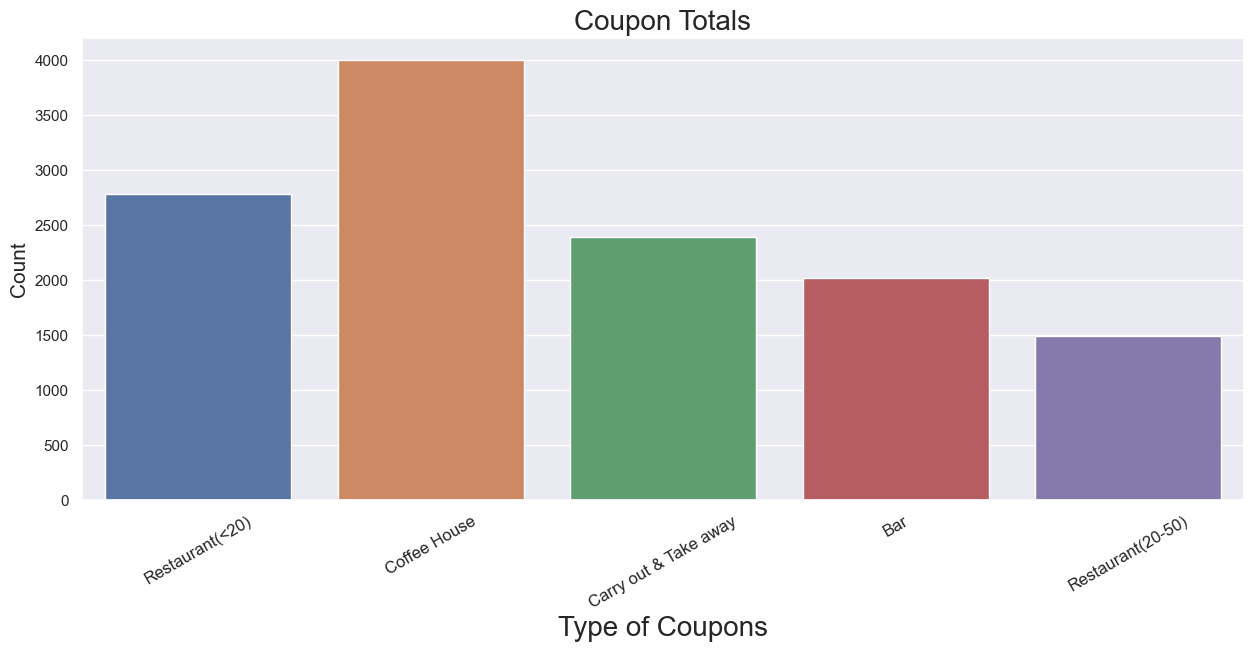

In [31]:
fig = sns.countplot(data =dfrenamed,x="coupon")
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Type of Coupons", fontsize= 20)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=30 , fontsize = 12)
plt.show()

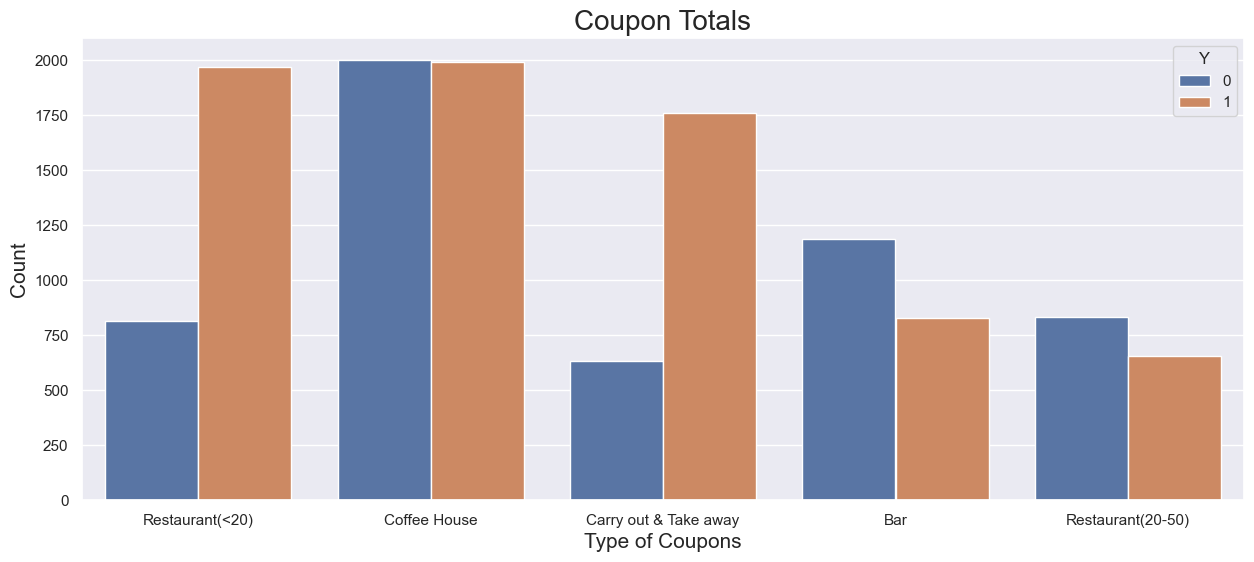

In [32]:
fig = sns.countplot(data =dfrenamed,x="coupon", hue ='Y')
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Type of Coupons", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.show()

Text(0.5, 1.0, 'Coupon Distribution by Temperature')

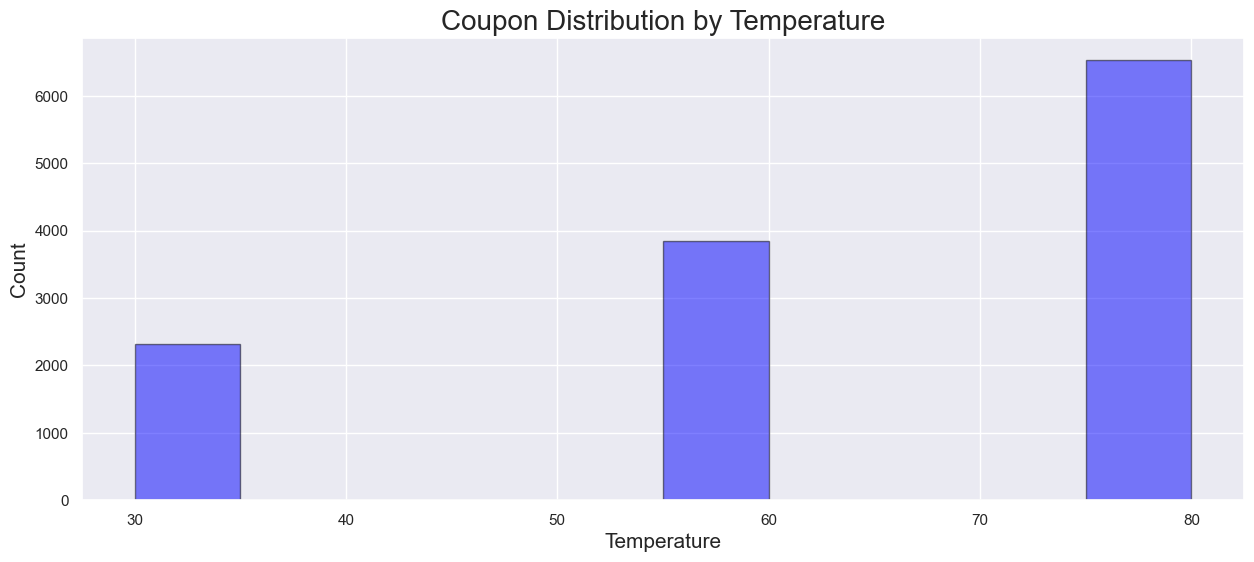

In [33]:
# Use a histogram to visualize the temperature column
plt.hist(dfrenamed['temperature'],color="blue",alpha=0.5,edgecolor = "black")
plt.xlabel("Temperature", fontsize =15)
plt.ylabel("Count", fontsize =15)
plt.title("Coupon Distribution by Temperature", fontsize= 20)
#plt.savefig('Temperature.png')

<blockquote>
The data suggests that as the temperature increased, more coupons were offered. 
This is logical as people are more likely to be driving and out and about when the weather is warmer.
</blockquote>

# Investigation of Bar Coupons

In [35]:
#Create a new DataFrame that contains just the bar coupons.
barcoupons_only = dfrenamed[dfrenamed["coupon"] == "Bar"]

In [36]:
barcoupons_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passenger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null  

In [37]:
#What proportion of the bar coupons were accepted
barcoupon_accept = (barcoupons_only['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(barcoupon_accept)

   Y  percentage
0  0   58.998513
1  1   41.001487


## 59% of the bar coupons were accepted

### Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [38]:
barunder3 = barcoupons_only.query('(Bar== "1~3") or (Bar=="less1") or (Bar=="never")')

In [39]:
barunder3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 9 to 12682
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1797 non-null   object
 1   passenger             1797 non-null   object
 2   weather               1797 non-null   object
 3   temperature           1797 non-null   int64 
 4   time                  1797 non-null   object
 5   coupon                1797 non-null   object
 6   expiration            1797 non-null   object
 7   gender                1797 non-null   object
 8   age                   1797 non-null   object
 9   maritalStatus         1797 non-null   object
 10  has_children          1797 non-null   int64 
 11  education             1797 non-null   object
 12  occupation            1797 non-null   object
 13  income                1797 non-null   object
 14  Bar                   1797 non-null   object
 15  CoffeeHouse           1770 non-null  

In [40]:
#What proportion of the bar coupons were accepted by those who go to bars less than 3 times
barunder3_accept = (barunder3['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(barunder3_accept)

   Y  percentage
0  0    62.93823
1  1    37.06177


### Drivers who went to bars less than three times accepted coupons 63% of the time

In [35]:
bar3ormore = barcoupons_only.query('(Bar== "gt8") or (Bar=="4~8")')
bar3ormore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 156 to 12215
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           199 non-null    object
 1   passenger             199 non-null    object
 2   weather               199 non-null    object
 3   temperature           199 non-null    int64 
 4   time                  199 non-null    object
 5   coupon                199 non-null    object
 6   expiration            199 non-null    object
 7   gender                199 non-null    object
 8   age                   199 non-null    object
 9   maritalStatus         199 non-null    object
 10  has_children          199 non-null    int64 
 11  education             199 non-null    object
 12  occupation            199 non-null    object
 13  income                199 non-null    object
 14  Bar                   199 non-null    object
 15  CoffeeHouse           196 non-null  

In [36]:
#What proportion of the bar coupons were accepted by those who go to bars more than 3 times
bar3ormore_accept = (bar3ormore['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(bar3ormore_accept)

   Y  percentage
0  1   76.884422
1  0   23.115578


### Folks who went to bars more than three times accepted coupons 76% of the time.

### Folks who went to bars less than three times accepted coupons 63% of the time.

### So there is a higher acceptance rate for visits greater than 3.

#### Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [42]:
print(barcoupons_only['age'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [43]:
#Coupons for drivers over 25
driverover25 = barcoupons_only.query('age in ["26","31","36", "41","46","50plus"]')
driverover25.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 46 to 12682
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1513 non-null   object
 1   passenger             1513 non-null   object
 2   weather               1513 non-null   object
 3   temperature           1513 non-null   int64 
 4   time                  1513 non-null   object
 5   coupon                1513 non-null   object
 6   expiration            1513 non-null   object
 7   gender                1513 non-null   object
 8   age                   1513 non-null   object
 9   maritalStatus         1513 non-null   object
 10  has_children          1513 non-null   int64 
 11  education             1513 non-null   object
 12  occupation            1513 non-null   object
 13  income                1513 non-null   object
 14  Bar                   1493 non-null   object
 15  CoffeeHouse           1475 non-null 

In [44]:
print(barcoupons_only['Bar'].unique())

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [45]:
bar25_morethan1 = driverover25.query('Bar in ["1~3","gt8","4~8"]')
bar25_morethan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 112 to 12500
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           420 non-null    object
 1   passenger             420 non-null    object
 2   weather               420 non-null    object
 3   temperature           420 non-null    int64 
 4   time                  420 non-null    object
 5   coupon                420 non-null    object
 6   expiration            420 non-null    object
 7   gender                420 non-null    object
 8   age                   420 non-null    object
 9   maritalStatus         420 non-null    object
 10  has_children          420 non-null    int64 
 11  education             420 non-null    object
 12  occupation            420 non-null    object
 13  income                420 non-null    object
 14  Bar                   420 non-null    object
 15  CoffeeHouse           414 non-null  

In [43]:
#What proportion of the bar coupons were accepted by those over 25 and visit bars more than once a month
bar25_morethan1_accept = (bar25_morethan1['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(bar25_morethan1_accept)

   Y  percentage
0  1    69.52381
1  0    30.47619


### 70% of the coupons were accepted by those over 25 and visiting bars more than once a month

In [46]:
#Coupons for drivers over 25
driverunder25 = barcoupons_only.query('age in ["21","below21"]')
driverunder25.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 9 to 12632
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           504 non-null    object
 1   passenger             504 non-null    object
 2   weather               504 non-null    object
 3   temperature           504 non-null    int64 
 4   time                  504 non-null    object
 5   coupon                504 non-null    object
 6   expiration            504 non-null    object
 7   gender                504 non-null    object
 8   age                   504 non-null    object
 9   maritalStatus         504 non-null    object
 10  has_children          504 non-null    int64 
 11  education             504 non-null    object
 12  occupation            504 non-null    object
 13  income                504 non-null    object
 14  Bar                   503 non-null    object
 15  CoffeeHouse           503 non-null    

In [48]:
#Drivers over 25 who visit bars less than once a month
baru25_less_than1 = driverunder25.query('Bar in ["never","less1"]')
baru25_less_than1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 9 to 12632
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           327 non-null    object
 1   passenger             327 non-null    object
 2   weather               327 non-null    object
 3   temperature           327 non-null    int64 
 4   time                  327 non-null    object
 5   coupon                327 non-null    object
 6   expiration            327 non-null    object
 7   gender                327 non-null    object
 8   age                   327 non-null    object
 9   maritalStatus         327 non-null    object
 10  has_children          327 non-null    int64 
 11  education             327 non-null    object
 12  occupation            327 non-null    object
 13  income                327 non-null    object
 14  Bar                   327 non-null    object
 15  CoffeeHouse           327 non-null    

In [49]:
#What proportion of the bar coupons were accepted by those under 25 and visit bars less than once a month
baru25_less_than1_accept = (baru25_less_than1['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(baru25_less_than1_accept)

   Y  percentage
0  0   60.550459
1  1   39.449541


### 60% of the coupons were accepted by those under 25 and visiting bars less than once a month


### 70% of the coupons were accepted by those over 25 and visiting bars more than once a month

### So older multiple visit patrons had a higher acceptance rate

### 60% of the coupons were accepted by those under 25 and visiting bars less than once a month
However those in the age group below 21 could accept the coupon but that does not mean they were served alcohol in the US
as it is against the law. We can do some research to find if people under 21 accepted the coupon as below

In [50]:
driver21 = barcoupons_only.query('age in ["21"]')
driver21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 9 to 12632
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           417 non-null    object
 1   passenger             417 non-null    object
 2   weather               417 non-null    object
 3   temperature           417 non-null    int64 
 4   time                  417 non-null    object
 5   coupon                417 non-null    object
 6   expiration            417 non-null    object
 7   gender                417 non-null    object
 8   age                   417 non-null    object
 9   maritalStatus         417 non-null    object
 10  has_children          417 non-null    int64 
 11  education             417 non-null    object
 12  occupation            417 non-null    object
 13  income                417 non-null    object
 14  Bar                   416 non-null    object
 15  CoffeeHouse           416 non-null    

In [51]:
driveru21 = barcoupons_only.query('age in ["below21"]')
driveru21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1217 to 11930
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           87 non-null     object
 1   passenger             87 non-null     object
 2   weather               87 non-null     object
 3   temperature           87 non-null     int64 
 4   time                  87 non-null     object
 5   coupon                87 non-null     object
 6   expiration            87 non-null     object
 7   gender                87 non-null     object
 8   age                   87 non-null     object
 9   maritalStatus         87 non-null     object
 10  has_children          87 non-null     int64 
 11  education             87 non-null     object
 12  occupation            87 non-null     object
 13  income                87 non-null     object
 14  Bar                   87 non-null     object
 15  CoffeeHouse           87 non-null   

In [52]:
print(driveru21['Y'].unique())

[1 0]


In [53]:
# So some of those under 21 accepted the coupon. Maybe we should eliminate these 87 entries going by the law but we
# will keep it as is.

In [54]:
#What proportion of the bar coupons were accepted by those under 21 which is illegal
driveru21_accept = (driveru21['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(driveru21_accept)

   Y  percentage
0  0    58.62069
1  1    41.37931


### Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [51]:
print(barcoupons_only['Bar'].unique())

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [52]:
bar1ormore = barcoupons_only.query('Bar in ["1~3","gt8","4~8"]')
bar1ormore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 90 to 12544
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           596 non-null    object
 1   passenger             596 non-null    object
 2   weather               596 non-null    object
 3   temperature           596 non-null    int64 
 4   time                  596 non-null    object
 5   coupon                596 non-null    object
 6   expiration            596 non-null    object
 7   gender                596 non-null    object
 8   age                   596 non-null    object
 9   maritalStatus         596 non-null    object
 10  has_children          596 non-null    int64 
 11  education             596 non-null    object
 12  occupation            596 non-null    object
 13  income                596 non-null    object
 14  Bar                   596 non-null    object
 15  CoffeeHouse           590 non-null   

In [53]:
print(bar1ormore['passenger'].unique())

['Friend(s)' 'Alone' 'Partner' 'Kid(s)']


In [54]:
bar1nokids= bar1ormore.query('passenger in ["Friend(s)","Alone","Partner"]')
bar1nokids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 90 to 12544
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           551 non-null    object
 1   passenger             551 non-null    object
 2   weather               551 non-null    object
 3   temperature           551 non-null    int64 
 4   time                  551 non-null    object
 5   coupon                551 non-null    object
 6   expiration            551 non-null    object
 7   gender                551 non-null    object
 8   age                   551 non-null    object
 9   maritalStatus         551 non-null    object
 10  has_children          551 non-null    int64 
 11  education             551 non-null    object
 12  occupation            551 non-null    object
 13  income                551 non-null    object
 14  Bar                   551 non-null    object
 15  CoffeeHouse           546 non-null   

In [55]:
print(bar1nokids['occupation'].unique())

['Student' 'Healthcare Support' 'Management' 'Unemployed'
 'Sales & Related' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Life Physical Social Science'
 'Retired' 'Computer & Mathematical'
 'Healthcare Practitioners & Technical' 'Personal Care & Service'
 'Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Protective Service' 'Business & Financial'
 'Food Preparation & Serving Related' 'Installation Maintenance & Repair'
 'Education&Training&Library' 'Community & Social Services'
 'Production Occupations' 'Transportation & Material Moving'
 'Building & Grounds Cleaning & Maintenance']


In [56]:
# The dataframe "bar1nokids does not include anyone with farming fishing or forestry anyway so we can use that data frame"

In [57]:
#What proportion of the bar coupons were accepted by those
#between drivers who go to bars more than once a month 
#and had passengers that were not a kid 
#and had occupations other than farming, fishing, or forestry.

bar1nokids_accept = (bar1nokids['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(bar1nokids_accept)

   Y  percentage
0  1   71.324864
1  0   28.675136


### We see that there was a 71% acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

In [60]:
# Find acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, 
#and were not widowed

In [61]:
print(bar1nokids['maritalStatus'].unique())

['Single' 'Unmarried partner' 'Married partner' 'Divorced']


### The acceptance rate for for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is also 71% since the data frame does not include any widowed passengers when the set is more than 1 bar visit a month plus no kids as passengers

In [62]:
# Finding the acceptance rate for those who go to bars more than once a month and are under the age of 30

In [63]:
bar1u30= bar1ormore.query('age in ["21", "26","below21"]')
bar1u30.info()

bar1u30_accept = (bar1u30['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(bar1u30_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 90 to 12544
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           345 non-null    object
 1   passenger             345 non-null    object
 2   weather               345 non-null    object
 3   temperature           345 non-null    int64 
 4   time                  345 non-null    object
 5   coupon                345 non-null    object
 6   expiration            345 non-null    object
 7   gender                345 non-null    object
 8   age                   345 non-null    object
 9   maritalStatus         345 non-null    object
 10  has_children          345 non-null    int64 
 11  education             345 non-null    object
 12  occupation            345 non-null    object
 13  income                345 non-null    object
 14  Bar                   345 non-null    object
 15  CoffeeHouse           342 non-null   

### The acceptance rate for those who go to bars more than once a month and are under the age of 30 is 72%

In [64]:
# Find the acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [65]:
print(barcoupons_only['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [66]:
bar_low_inc = barcoupons_only.query('income in ["Less than $12500", "$12500 - $24999","$25000 - $37499","$37500 - $49999"]')
bar_low_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 9 to 12632
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1038 non-null   object
 1   passenger             1038 non-null   object
 2   weather               1038 non-null   object
 3   temperature           1038 non-null   int64 
 4   time                  1038 non-null   object
 5   coupon                1038 non-null   object
 6   expiration            1038 non-null   object
 7   gender                1038 non-null   object
 8   age                   1038 non-null   object
 9   maritalStatus         1038 non-null   object
 10  has_children          1038 non-null   int64 
 11  education             1038 non-null   object
 12  occupation            1038 non-null   object
 13  income                1038 non-null   object
 14  Bar                   1030 non-null   object
 15  CoffeeHouse           1012 non-null  

In [67]:
print(bar_low_inc['RestaurantLessThan20'].unique())

['4~8' '1~3' 'less1' 'gt8' 'never' nan]


In [68]:
bar_low_inc_4 = bar_low_inc.query('RestaurantLessThan20 in ["4~8", "gt8"]')
bar_low_inc_4.info()

bar_low_inc_4_accept = (bar_low_inc_4['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(bar_low_inc_4_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 9 to 12544
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           344 non-null    object
 1   passenger             344 non-null    object
 2   weather               344 non-null    object
 3   temperature           344 non-null    int64 
 4   time                  344 non-null    object
 5   coupon                344 non-null    object
 6   expiration            344 non-null    object
 7   gender                344 non-null    object
 8   age                   344 non-null    object
 9   maritalStatus         344 non-null    object
 10  has_children          344 non-null    int64 
 11  education             344 non-null    object
 12  occupation            344 non-null    object
 13  income                344 non-null    object
 14  Bar                   339 non-null    object
 15  CoffeeHouse           341 non-null    

### The acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K is 54%

### Overall 59% of the bar coupons were accepted.

### Drivers who went to bars less than three times accepted coupons 63% of the time
### Drivers who went to bars more than three times accepted coupons 76% of the time

### Drivers over 25 and visiting bars more than once a month accepted coupons 70% of the time
### Drivers under 25 and visiting bars less than once a month accepted coupons 60% of the time

### Drivers who go to bars more than once a month and had passengers that were not a kid 
### and had occupations other than farming, fishing, or forestry accepted coupons 71% of the time

### Drivers who go to bars more than once a month, and had passengers that were not a kid,  
### and were not widowed also accepted coupons 71% of the time

### Drivers who go to bars more than once a month and are under the age of 30 accepted coupons 72% of the time

### Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K accepted coupons 54%

## Summarizing: Older drivers over 25 visiting bars more than three times a month had the largest acceptance rate.
## Younger drivers who went to bars more than once a month also has a high acceptance rate.
## The overall hit rate irrespective of demographics of bar coupons of 60% is quite impressive.

In [69]:
# Let us now see how takeout (carryaway) coupons vary among various demographics

In [70]:
#Create a new DataFrame that contains just the Carryout and Takeaway coupons.
takeout= dfrenamed[dfrenamed["coupon"] == "Carry out & Take away"]
takeout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2393 entries, 2 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2393 non-null   object
 1   passenger             2393 non-null   object
 2   weather               2393 non-null   object
 3   temperature           2393 non-null   int64 
 4   time                  2393 non-null   object
 5   coupon                2393 non-null   object
 6   expiration            2393 non-null   object
 7   gender                2393 non-null   object
 8   age                   2393 non-null   object
 9   maritalStatus         2393 non-null   object
 10  has_children          2393 non-null   int64 
 11  education             2393 non-null   object
 12  occupation            2393 non-null   object
 13  income                2393 non-null   object
 14  Bar                   2377 non-null   object
 15  CoffeeHouse           2361 non-null  

In [71]:
#What proportion of the takeout coupons were accepted
takeout_accept = (takeout['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_accept)

   Y  percentage
0  1   73.547848
1  0   26.452152


In [72]:
# Drivers accepted take out coupons 74% of the time

In [81]:
# Let us see if the destination made a difference in the acceptance rate
takeout_home = takeout.query('destination in ["Home"]')
takeout_home.info()

takeout_home_accept = (takeout_home['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_home_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 4014 to 12679
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           653 non-null    object
 1   passenger             653 non-null    object
 2   weather               653 non-null    object
 3   temperature           653 non-null    int64 
 4   time                  653 non-null    object
 5   coupon                653 non-null    object
 6   expiration            653 non-null    object
 7   gender                653 non-null    object
 8   age                   653 non-null    object
 9   maritalStatus         653 non-null    object
 10  has_children          653 non-null    int64 
 11  education             653 non-null    object
 12  occupation            653 non-null    object
 13  income                653 non-null    object
 14  Bar                   648 non-null    object
 15  CoffeeHouse           643 non-null 

In [82]:
# Almost 80% of the folks on their way home accepted a takeout coupon
# Let us see the difference for those drive to work or no place in particular

# Let us see if the destination made a difference in the acceptance rate
takeout_other = takeout.query('destination in ["Work","No Urgent Place"]')
#takeout_other = takeout.query('destination in ["No Urgent Place"]')
#takeout_other = takeout.query('destination in ["Work"]')
takeout_other.info()

takeout_other_accept = (takeout_other['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_other_accept)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 2 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1740 non-null   object
 1   passenger             1740 non-null   object
 2   weather               1740 non-null   object
 3   temperature           1740 non-null   int64 
 4   time                  1740 non-null   object
 5   coupon                1740 non-null   object
 6   expiration            1740 non-null   object
 7   gender                1740 non-null   object
 8   age                   1740 non-null   object
 9   maritalStatus         1740 non-null   object
 10  has_children          1740 non-null   int64 
 11  education             1740 non-null   object
 12  occupation            1740 non-null   object
 13  income                1740 non-null   object
 14  Bar                   1729 non-null   object
 15  CoffeeHouse           1718 non-null  

### We see that if you are driving to work you have the lowest acceptance rate of 65%, then 76% with no particular destination in place and 71% if you combine these two groups

### We know that almost 80% of the folks on their way home accepted a carryout coupon. For all carry out coupons irrespective of destination, let us examine the importance of having a child at home.

In [91]:
takeout_child = takeout.query('has_children == 1')
takeout_child.info()

takeout_child_accept = (takeout_child['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_child_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 2 to 12658
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1026 non-null   object
 1   passenger             1026 non-null   object
 2   weather               1026 non-null   object
 3   temperature           1026 non-null   int64 
 4   time                  1026 non-null   object
 5   coupon                1026 non-null   object
 6   expiration            1026 non-null   object
 7   gender                1026 non-null   object
 8   age                   1026 non-null   object
 9   maritalStatus         1026 non-null   object
 10  has_children          1026 non-null   int64 
 11  education             1026 non-null   object
 12  occupation            1026 non-null   object
 13  income                1026 non-null   object
 14  Bar                   1016 non-null   object
 15  CoffeeHouse           1015 non-null  

### All drivers with children at home accepted carry out coupons 74% of the time

In [93]:
# How does the acceptance rate of carryout change where there are no child at home

takeout_no_child = takeout.query('has_children == 0')
takeout_no_child.info()

takeout_no_child_accept = (takeout_no_child['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_no_child_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 25 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1367 non-null   object
 1   passenger             1367 non-null   object
 2   weather               1367 non-null   object
 3   temperature           1367 non-null   int64 
 4   time                  1367 non-null   object
 5   coupon                1367 non-null   object
 6   expiration            1367 non-null   object
 7   gender                1367 non-null   object
 8   age                   1367 non-null   object
 9   maritalStatus         1367 non-null   object
 10  has_children          1367 non-null   int64 
 11  education             1367 non-null   object
 12  occupation            1367 non-null   object
 13  income                1367 non-null   object
 14  Bar                   1361 non-null   object
 15  CoffeeHouse           1346 non-null 

### Looks like the acceptance rate is 73% and there is no material difference between having children at home or not.

In [73]:
# Let us look at the direction of the drive

takeout_direction_same = takeout.query('direction_same == 1')
takeout_direction_same.info()

takeout_direction_same_accept = (takeout_direction_same['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_direction_same_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 19 to 12679
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           793 non-null    object
 1   passenger             793 non-null    object
 2   weather               793 non-null    object
 3   temperature           793 non-null    int64 
 4   time                  793 non-null    object
 5   coupon                793 non-null    object
 6   expiration            793 non-null    object
 7   gender                793 non-null    object
 8   age                   793 non-null    object
 9   maritalStatus         793 non-null    object
 10  has_children          793 non-null    int64 
 11  education             793 non-null    object
 12  occupation            793 non-null    object
 13  income                793 non-null    object
 14  Bar                   789 non-null    object
 15  CoffeeHouse           784 non-null   

In [74]:
# Driver acceptance was 70% of carryout coupons if driving in the same direction.
# Now let ius look at drivers driving in opposite direction

takeout_direction_opp = takeout.query('direction_opp == 1')
takeout_direction_opp.info()

takeout_direction_opp_accept = (takeout_direction_opp['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(takeout_direction_opp_accept)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 2 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1600 non-null   object
 1   passenger             1600 non-null   object
 2   weather               1600 non-null   object
 3   temperature           1600 non-null   int64 
 4   time                  1600 non-null   object
 5   coupon                1600 non-null   object
 6   expiration            1600 non-null   object
 7   gender                1600 non-null   object
 8   age                   1600 non-null   object
 9   maritalStatus         1600 non-null   object
 10  has_children          1600 non-null   int64 
 11  education             1600 non-null   object
 12  occupation            1600 non-null   object
 13  income                1600 non-null   object
 14  Bar                   1588 non-null   object
 15  CoffeeHouse           1577 non-null  

### Driver acceptance was 75% of carryout coupons if driving in the opposite direction which is higher than 70% acceptance in the same direction and this is counterintuitive. 
### This specific data may be incorrect or drivers don't mind turning around if the deal is good.

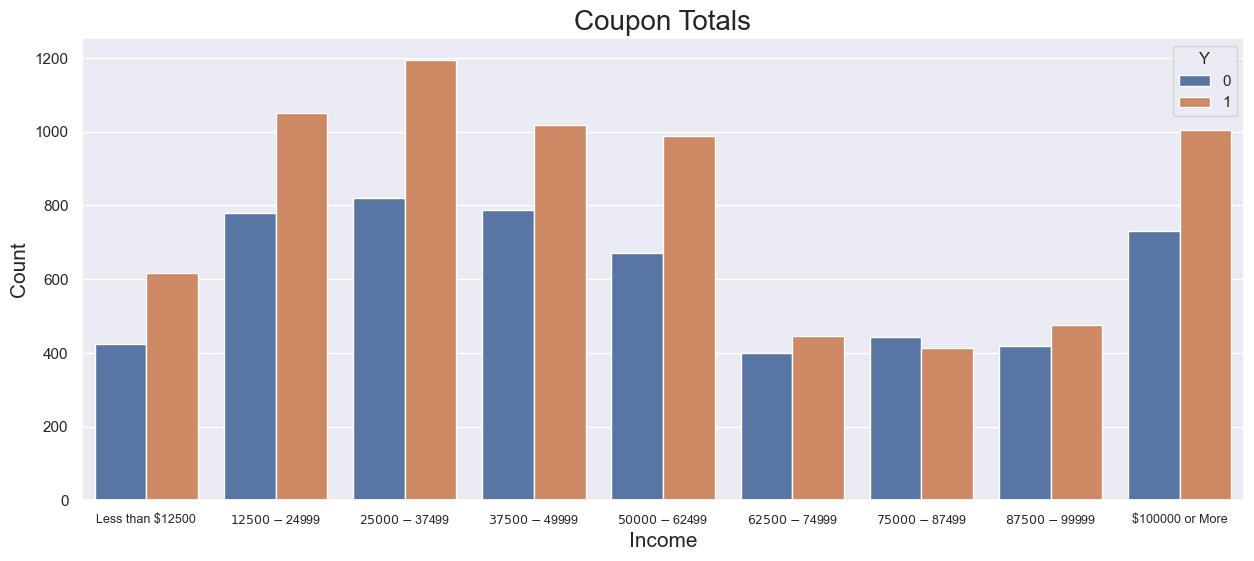

In [104]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at Income and acceptance rate

fig = sns.countplot(data =dfrenamed, order =['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999',
                                             '$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999',
                                             '$100000 or More'],x="income", hue ='Y')
sns.set(rc = {'figure.figsize':(15,10)})
plt.xlabel("Income", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
fig.set_xticklabels(fig.get_xticklabels(), rotation=0 , fontsize = 9)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/income_coupon_accept.png')
plt.show()






### Overall lower incomes have higher acceptance across all the areas until you make USD 62,500 For the next three income brands acceptance rate is about the same.The only outlier is if the income is USD 100,000 or more

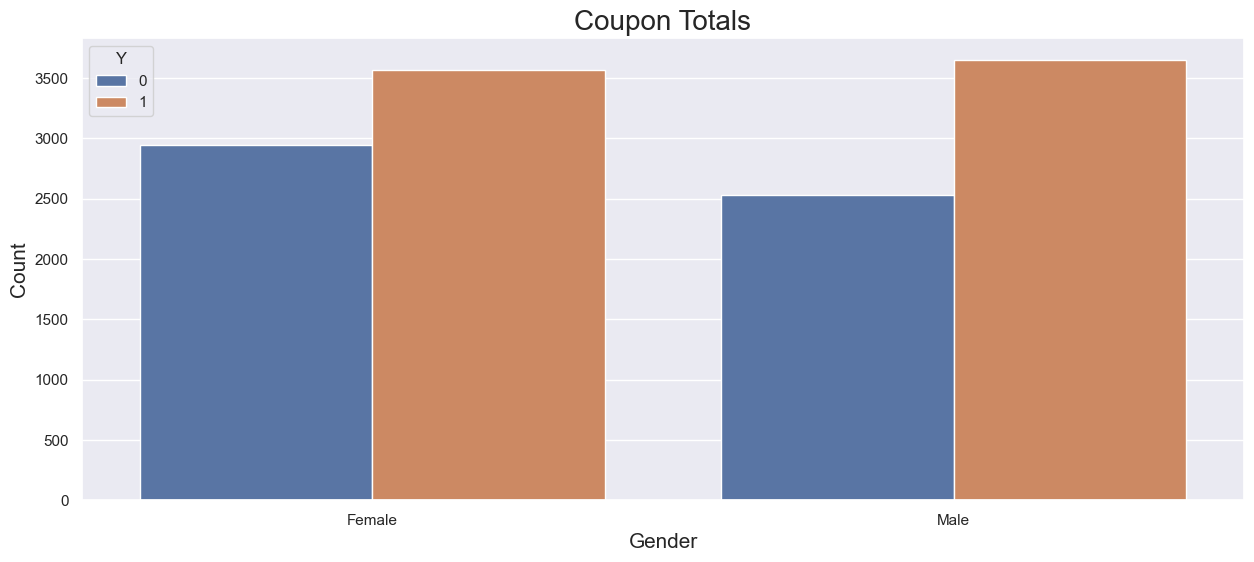

In [103]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at Gender and acceptance rate

fig = sns.countplot(data =dfrenamed,x="gender", hue ='Y')
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Gender", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)


plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/gender_coupon_accept.png')
plt.show()

In [86]:
# We see there is more rejection of coupons by females but we need to look at the data set too
gender_counts = (dfrenamed['gender'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Gender')
                .reset_index(name='percentage'))
print(gender_counts)


   Gender  percentage
0  Female   51.332387
1    Male   48.667613


### We find that the data set is slightly more female but that would not account for the difference we see in the higher acceptance by males.

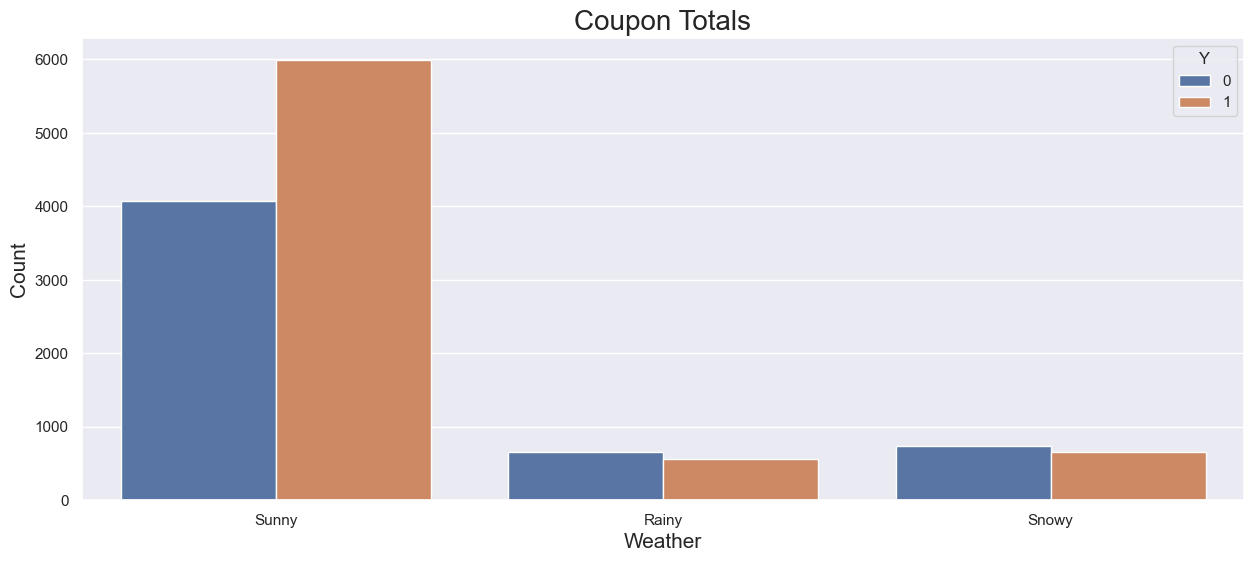

In [99]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at weather and acceptance rate

fig = sns.countplot(data =dfrenamed,x="weather", hue ='Y')
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Weather", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/weather_coupon_accept.png')
plt.show()

### When the day is sunny,more coupons are accepted than rejected and more coupons are rejected than accepted on rainy and snowy days

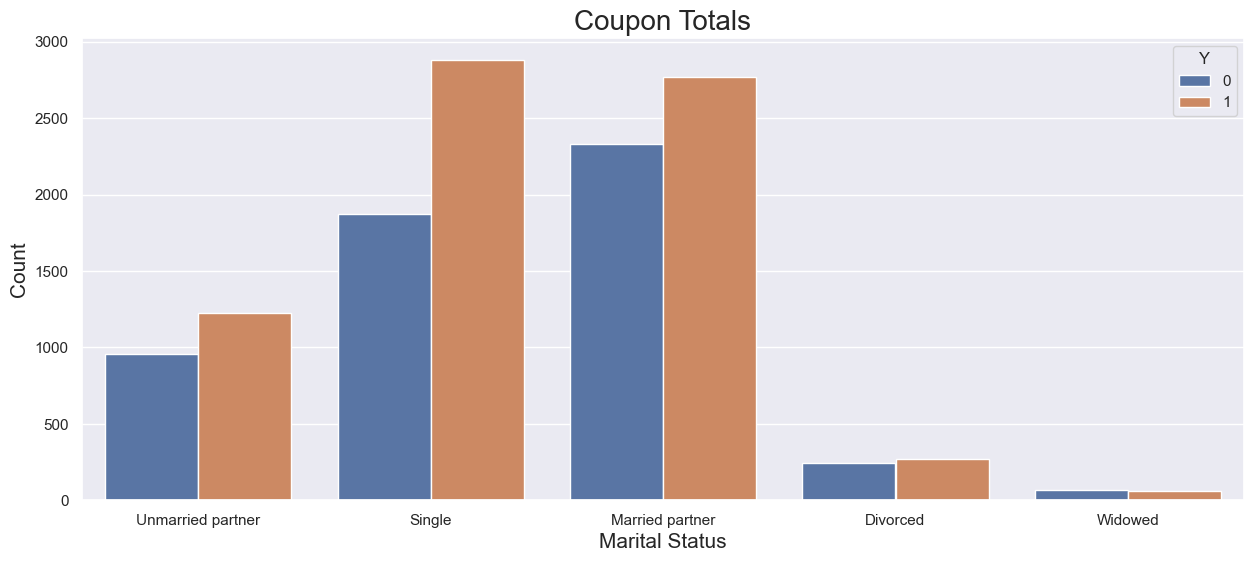

       Martal Status  percentage
0    Married partner   40.208136
1             Single   37.464522
2  Unmarried partner   17.234311
3           Divorced    4.068117
4            Widowed    1.024913


In [98]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at martial status and acceptance rate

fig = sns.countplot(data =dfrenamed,x="maritalStatus", hue ='Y')
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Marital Status", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/marital_status_coupon_accept.png')
plt.show()

# What is the distribution of marital status across the data set?
marital_status = (dfrenamed['maritalStatus'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Martal Status')
                .reset_index(name='percentage'))
print(marital_status)



### About 78% of the data set consists of Single and Married partner Marital status.

In [89]:
marital_subset= dfrenamed.query('maritalStatus in ["Single", "Married partner"]')
marital_subset.info()

marital_subset_accept = (marital_subset['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(marital_subset_accept)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9852 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           9852 non-null   object
 1   passenger             9852 non-null   object
 2   weather               9852 non-null   object
 3   temperature           9852 non-null   int64 
 4   time                  9852 non-null   object
 5   coupon                9852 non-null   object
 6   expiration            9852 non-null   object
 7   gender                9852 non-null   object
 8   age                   9852 non-null   object
 9   maritalStatus         9852 non-null   object
 10  has_children          9852 non-null   int64 
 11  education             9852 non-null   object
 12  occupation            9852 non-null   object
 13  income                9852 non-null   object
 14  Bar                   9763 non-null   object
 15  CoffeeHouse           9697 non-null 

### We see that 57% of Single and Married Partner categories accepted the coupons

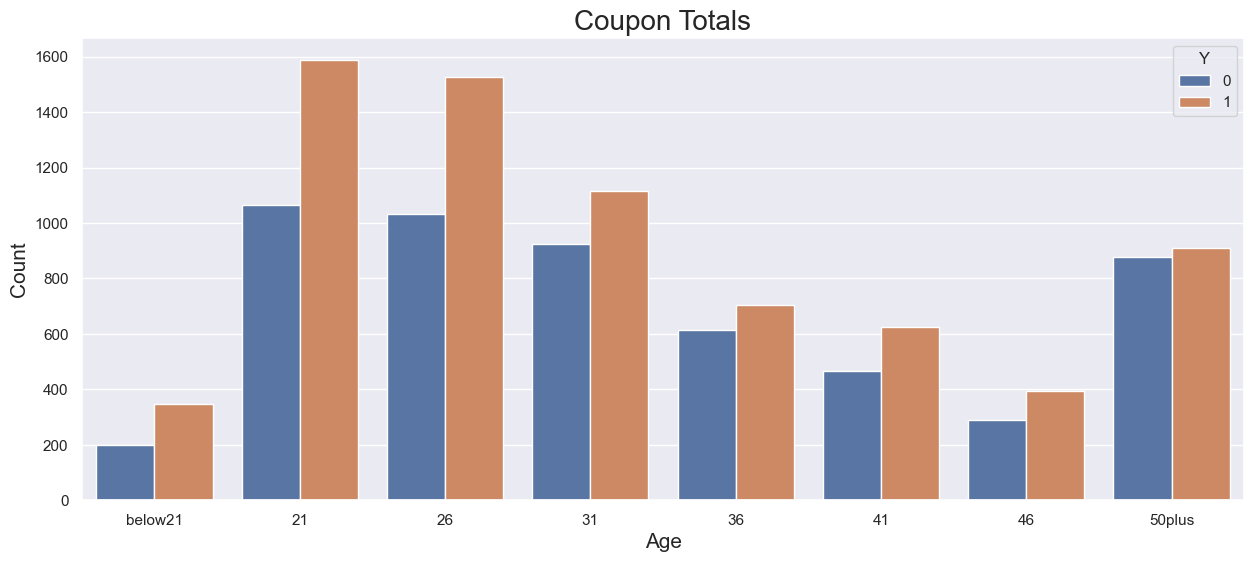

In [97]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at age and acceptance rate

fig = sns.countplot(data =dfrenamed,x="age", hue ='Y',order =['below21','21','26','31','36','41','46','50plus'])
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Age", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/age_coupon_accept.png')
plt.show()


In [91]:
# Younger demographics accept more coupons. After age 36, the acceptance and rejections are about the same.

age_under_30 = dfrenamed.query('age not in ["31","36","41", "46", "50plus"]')
age_under_30.info()

age_under_30_accept = (age_under_30['Y'].value_counts(normalize=True)
                .mul(100)
                .rename_axis('Y')
                .reset_index(name='percentage'))
print(age_under_30_accept)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5759 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           5759 non-null   object
 1   passenger             5759 non-null   object
 2   weather               5759 non-null   object
 3   temperature           5759 non-null   int64 
 4   time                  5759 non-null   object
 5   coupon                5759 non-null   object
 6   expiration            5759 non-null   object
 7   gender                5759 non-null   object
 8   age                   5759 non-null   object
 9   maritalStatus         5759 non-null   object
 10  has_children          5759 non-null   int64 
 11  education             5759 non-null   object
 12  occupation            5759 non-null   object
 13  income                5759 non-null   object
 14  Bar                   5741 non-null   object
 15  CoffeeHouse           5631 non-null  

### Persons under the age of 30 accept coupons 60% of the time

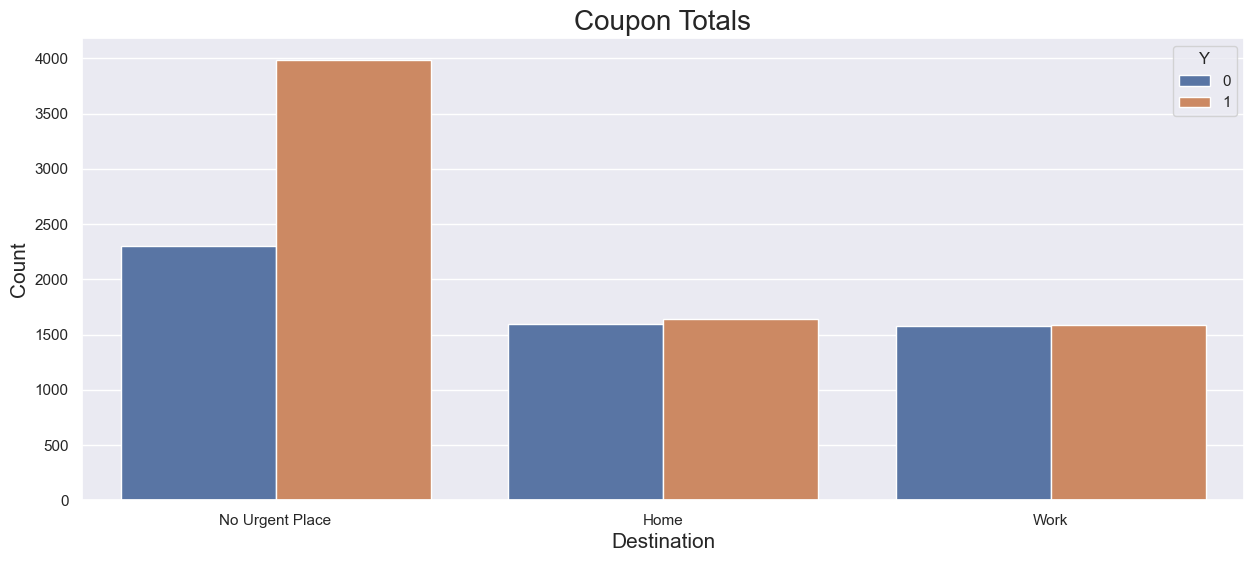

In [96]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at destination and acceptance rate

fig = sns.countplot(data =dfrenamed,x="destination", hue ='Y')
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Destination", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/destination_coupon_accept.png')
plt.show()

### When folks were not in a rush to get to work or home, they accepted more coupons

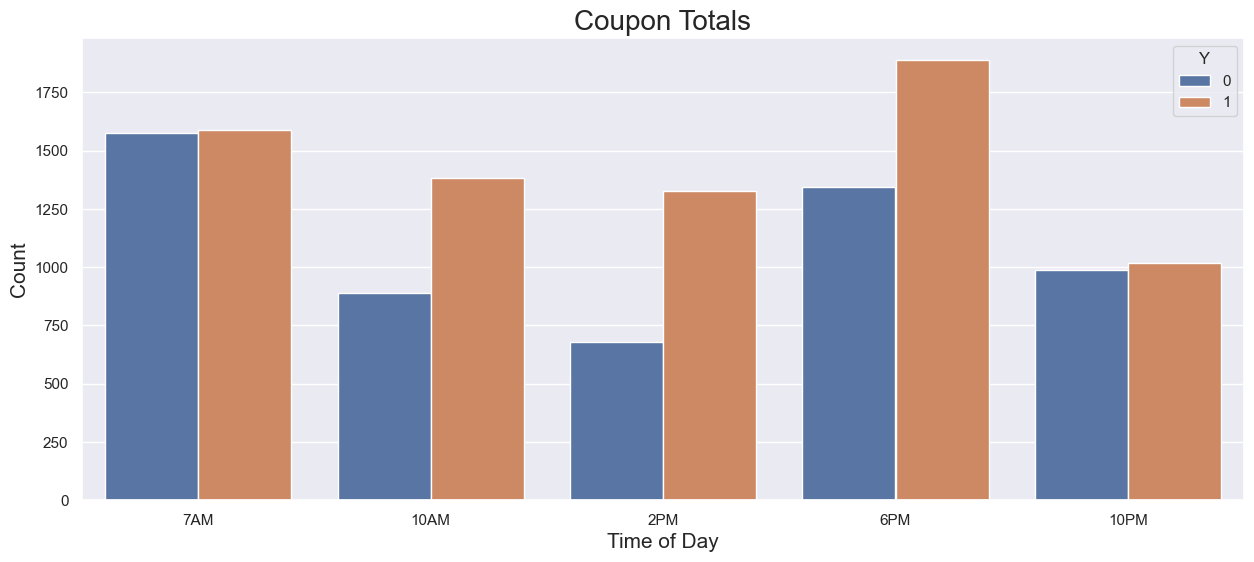

In [95]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at time and acceptance rate

fig = sns.countplot(data =dfrenamed,x="time", hue ='Y',order =['7AM','10AM','2PM','6PM','10PM'])
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Time of Day", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/timeofday_coupon_accept.png')
plt.show()

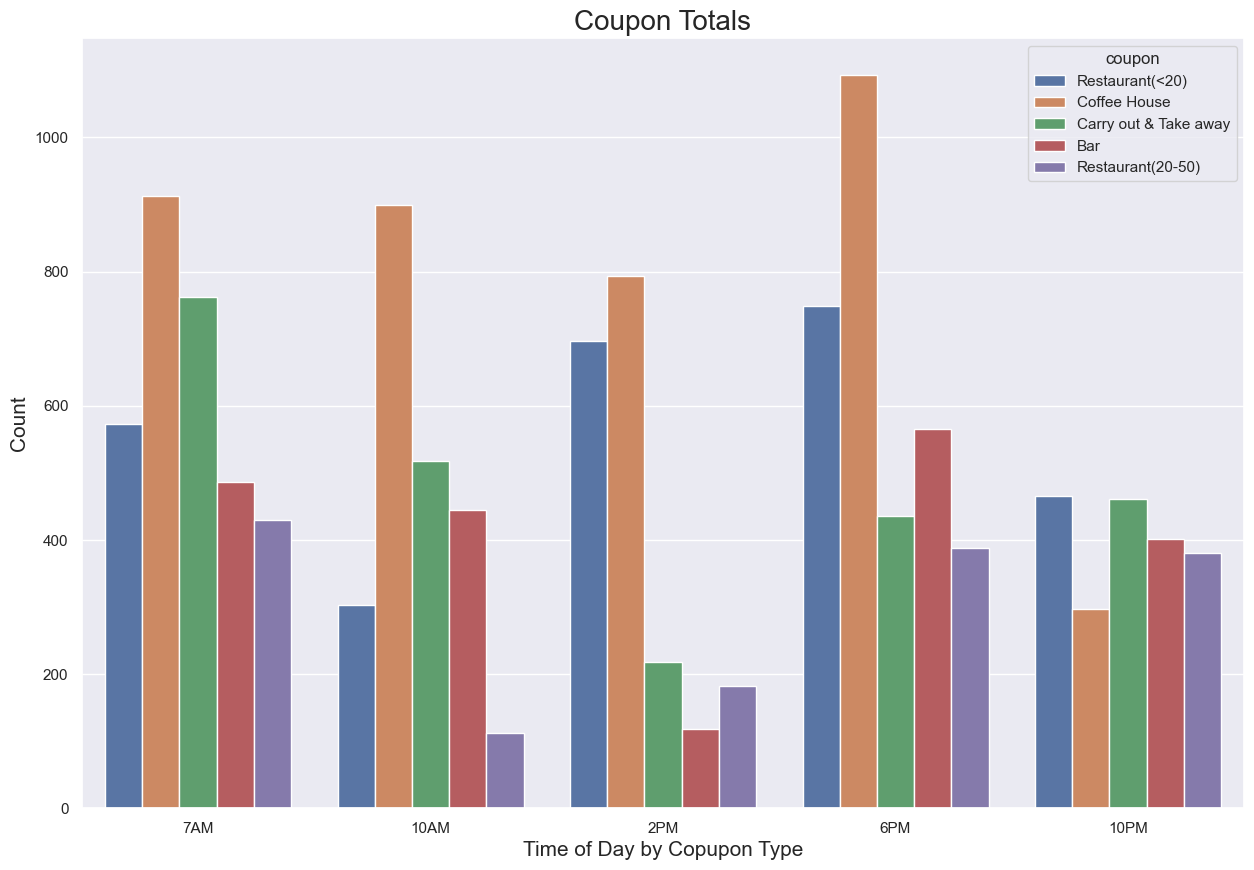

In [105]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at time and acceptance rate by coupon type

fig = sns.countplot(data =dfrenamed,x="time", hue ='coupon',order =['7AM','10AM','2PM','6PM','10PM'])
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Time of Day by Copupon Type", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/time_coupon_type.png')
plt.show()

### Some of the coupons data do not make sense. It is pointless to send a bar coupon or fine restaurant before lunch unless it has a 1 day expiry

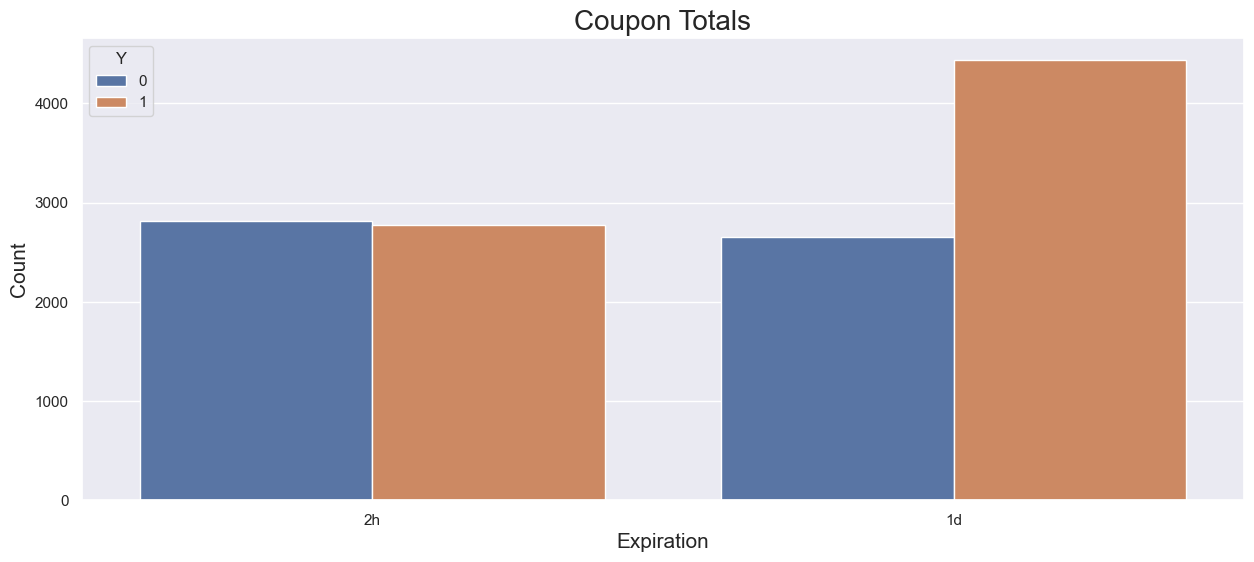

In [106]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at expiration  and acceptance rate by coupon type

fig = sns.countplot(data =dfrenamed,x= "expiration", hue ='Y', order =['2h','1d'])
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Expiration", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/expiration_coupon_accept.png')
plt.show()

### Coupons will longer validity are accepted more

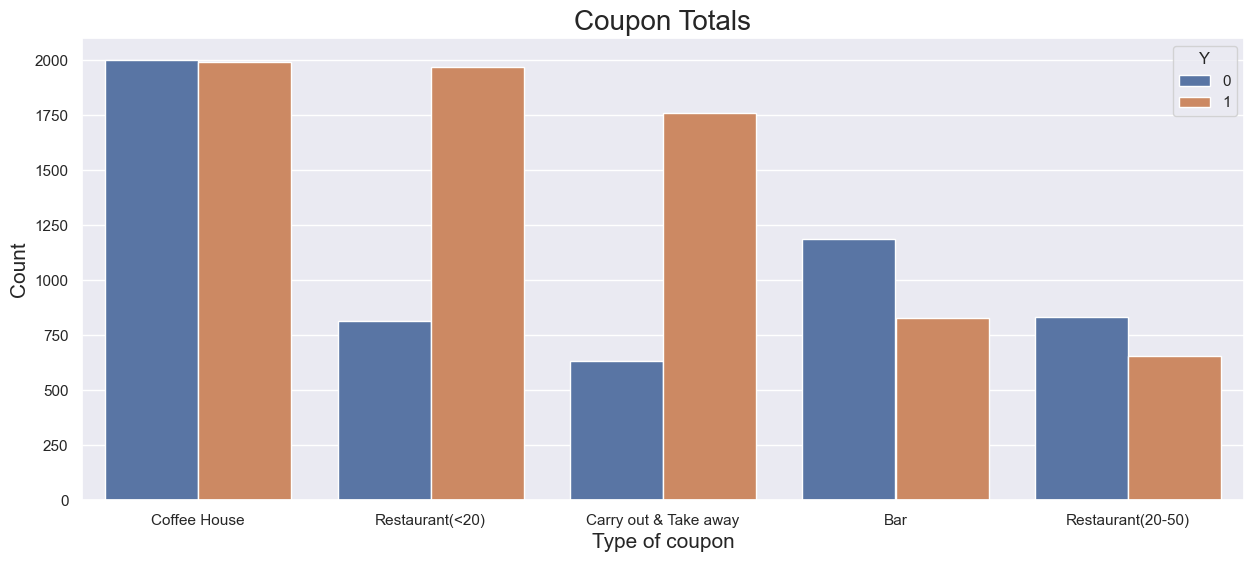

In [107]:
# Let us review some count plots across various coupon types and individual variables
#Here we look at coupon type  and acceptance rate by coupon type

fig = sns.countplot(data =dfrenamed,x= "coupon", hue ='Y', order =['Coffee House','Restaurant(<20)','Carry out & Take away','Bar','Restaurant(20-50)'])
sns.set(rc = {'figure.figsize':(15,6)})
plt.xlabel("Type of coupon", fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.title("Coupon Totals", fontsize= 20)
plt.savefig('C:/Users/ronny/Desktop/PracticalApplication1/images/coupon_type_accept.png')
plt.show()

### Cheap restaurants and Carry out has the highest acceptance rate.
### Coffee House and Cheap Restaurants total acceptance is about the same with carry out next. 
### As expected, bars and expensive restaurants have lower number of coupons offered and rejection rates are higher

### Recommendations:
### Keep offering coupons for Coffee House between the hours of 6 AM and 3PM
### Increase offering of Cheap Restaurants between 10 am and 10PM
### Increase offering of Carry out coupons between 10am and 10PM
### Bar and Expensive restaurant coupons should be offered between 6pm and 10PM irrespective of 2h expiry or 1 day expiry
### For Takeout coupons do not target a specific demographic
### For Expensive restaurant, target a higher income bracket
### For Coffee House, target a younger demographic
### For cheap restaurant target those with kids and lower income groups
